<div style="background-color:#044389; text-align:center; vertical-align: middle; padding:40px 0; margin-top:30px">
<h1 style="color:#FCFF4B">DataLab - Sprint 4 herkansing</h1>
<b style="color:black">Tim Oosterling, Rogier Gernaat & Ifraah Ghedi</b>
    </div>

<h2 style="color:#044389">0 voorbereiding</h2>

In [2]:
#importeren van libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#inladen van data 
data_train = pd.read_csv('train_c.csv') 
data_test= pd.read_csv('test_c.csv') 
display(data_test.head(), data_test.head())

,p_id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,1,1,85,66,29,0,26.6,0.351,31
1,4,0,137,40,35,168,43.1,2.288,33
2,13,1,189,60,23,846,30.1,0.398,59
3,14,5,166,72,19,175,25.8,0.587,51
4,20,3,126,88,41,235,39.3,0.704,27


,p_id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,1,1,85,66,29,0,26.6,0.351,31
1,4,0,137,40,35,168,43.1,2.288,33
2,13,1,189,60,23,846,30.1,0.398,59
3,14,5,166,72,19,175,25.8,0.587,51
4,20,3,126,88,41,235,39.3,0.704,27


| Kolom   |   Omschrijving |
|:--------|-----------:|
| p_id   |Dit lijkt een identificatienummer of index te zijn voor elk gegevenspunt. Het lijkt geen relevante functie te zijn voor de voorspelling van diabetes. |
| Pregnancies     | Pregnancies: Het aantal zwangerschappen dat de persoon heeft gehad. Dit is een numerieke functie die aangeeft hoe vaak de persoon zwanger is geweest. |
|  Glucose | De bloedglucosespiegel van de persoon, gemeten in milligram per deciliter (mg/dL). Dit is een numerieke functie die de glucosespiegel aangeeft. |
| Bloodpressure |De bloeddruk van de persoon, gemeten in millimeters kwik (mm Hg). Dit is een numerieke functie die de bloeddruk aangeeft. |
| Insulin |De insulinespiegel van de persoon, gemeten in milli-eenheden per milliliter (mu/ml). Dit is een numerieke functie die de insulinespiegel aangeeft.|
| BMI | De body mass index (BMI) van de persoon, berekend als gewicht in kilogram gedeeld door het kwadraat van de lengte in meters. Dit is een numerieke functie die de BMI aangeeft.|
| DiabetesPedigreeFunction | Een numerieke functie die een maatstaf lijkt te zijn voor genetische aanleg voor diabetes, berekend op basis van familiegeschiedenis.|
| Age | De leeftijd van de persoon in jaren. Dit is een numerieke functie die de leeftijd van de persoon aangeeft. |
| Outcome | Dit zegt of iemand diabetes heeft of niet. Waarbij 1 staat voor diabates en 0 niet |

<h4 style="color:#7CAFC4">Opdracht 1: EDA</h2>

Om machine learning met Scikit-Learn te kunnen toepassen, zijn er 3 belangrijke vereisten:

- Een dataframe: De gegevens moeten georganiseerd zijn in de vorm van een dataframe, waarbij elke rij een datapunt vertegenwoordigt en elke kolom een functie (feature) of de targetvariabele bevat.

- Numerieke waarden: De dataset moet voornamelijk numerieke waarden bevatten, omdat Scikit-Learn voornamelijk met numerieke gegevens werkt.

- Niet te veel ontbrekende waarden: Zorg ervoor dat de dataset niet veel ontbrekende waarden bevat, of dat je een strategie hebt om deze waarden aan te pakken, zoals invullen of verwijderen.





In [64]:
#check of in dataframe is
type(data_train)

pandas.core.frame.DataFrame

Check: data is georganiseerd in dataframe

In [55]:
#check of nummerieke waardes zijn
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   p_id                      614 non-null    int64  
 1   Pregnancies               614 non-null    int64  
 2   Glucose                   614 non-null    int64  
 3   BloodPressure             614 non-null    int64  
 4   SkinThickness             614 non-null    int64  
 5   Insulin                   614 non-null    int64  
 6   BMI                       614 non-null    float64
 7   DiabetesPedigreeFunction  614 non-null    float64
 8   Age                       614 non-null    int64  
 9   Outcome                   614 non-null    int64  
dtypes: float64(2), int64(8)
memory usage: 48.1 KB


Check: allemaal intgeres of floats, dus het zijn allemaal numerieke waardes.

In [56]:
#check missende waardes
print(data_train.isnull().sum())

p_id                        0
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


Geen missende waardes, maar ontbrekende waardes kunnen soms weergeven worden met getal 0

In [57]:
kolommen_met_nul = data_train.columns[(data_train == 0).any()]
# Toon de namen van de kolommen
print("Kolommen met minstens één waarde gelijk aan 0:")
print(kolommen_met_nul)

Kolommen met minstens één waarde gelijk aan 0:
Index(['p_id', 'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
       'Insulin', 'BMI', 'Outcome'],
      dtype='object')


Van de 9 kolommen zijn er 8 die 0 waardes hebben:
    
1. p_id ; het maakt niet uit of deze kolom 0 heeft. Het wordt toch niet gebruikt voor model.
2. Preganancies; 0 staat echt ergens voor. Je kunt 0 zwangerschappen hebben.
3. Glucose; De bloedglucosespiegel van een persoon kan normaal gesproken niet 0 mg/dL zijn. Een nulwaarde in deze kolom zou waarschijnlijk wijzen op een ontbrekende waarde of een fout in de gegevensregistratie.
4. De bloeddruk van een persoon kan ook niet normaal gesproken 0 mm Hg zijn. Een nulwaarde hier is niet realistisch en zou meestal worden beschouwd als een ontbrekende waarde.
5. SkinThickness: De huidplooidikte kan ook niet normaal gesproken 0 millimeter zijn. Een nulwaarde hier duidt meestal op een ontbrekende waarde.
6. Insulin: De insulinespiegel wordt gemeten in milli-eenheden per milliliter (mu/ml) en kan niet normaal gesproken 0 zijn. Een nulwaarde hier wijst meestal op een ontbrekende waarde.
7. BMI (Body Mass Index): De BMI wordt berekend op basis van gewicht en lengte en kan niet normaal gesproken 0 zijn, tenzij de persoon ofwel geen gewicht heeft (wat onrealistisch is) ofwel ontbrekende gegevens heeft voor gewicht en/of lengte.

dus eigenlijk maar 5 kolommen, waarvan de 0 waardes niet kloppen

In [58]:
#checken hoeveel waardes er missen bij deze kolommen

print((data_train[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] == 0).sum())

Glucose            4
BloodPressure     31
SkinThickness    184
Insulin          300
BMI               11
dtype: int64


Wat doen met deze kolommen?

<i>Bij meer dan 40% is het verstandig om deze kolom te verwijderen, omdat het invullen van ontbrekende waarden mogelijk niet zinvol is en het kan leiden tot ruis in je model. </i>

In [53]:
#basistatistieken van alle kolommen
data_train.describe()
data_train['p_id']

0      668
1      324
2      624
3      690
4      473
      ... 
609    384
610    224
611    729
612    630
613    472
Name: p_id, Length: 614, dtype: int64

In [4]:
#Nieuwe dataframe voor veranderingen
df_train_copy = data_train.copy()

<b> Wat doen met glucose? </b>  0.651% == 0

In [103]:
#glucose heeft maar 4 0 waardes, dus vervangen met gemiddelde
gemiddelde_glucose = df_train_copy['Glucose'].mean()
df_train_copy['Glucose'] = df_train_copy['Glucose'].replace(0, gemiddelde_glucose)
##STD, gemiddelde en max is daardoor niet veel veranderd

<b> Wat doen met BMI? </b>  1.79% == 0

In [119]:
#BMI heeft ook maar 11 missende waardes, dus vervangen ook met gemiddelde
gemiddelde_bmi = df_train_copy['BMI'].mean()
df_train_copy['BMI'] = df_train_copy['BMI'].replace(0, gemiddelde_bmi)
##STD, gemiddelde en max is daardoor niet veel veranderd

<b> Wat doen met Bloodpressure? </b>  5% == 0

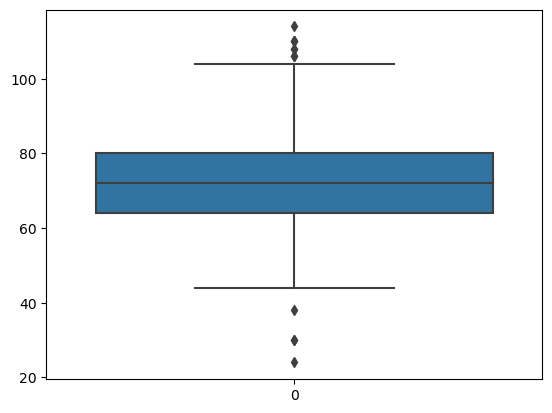

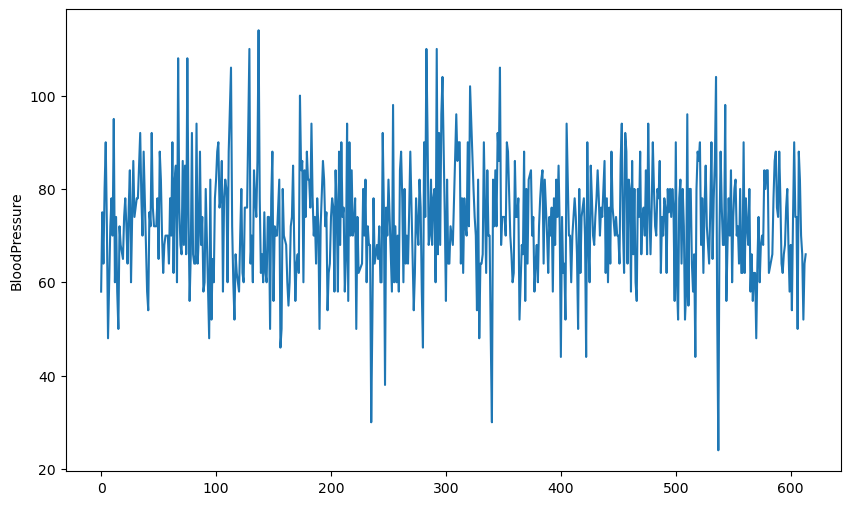

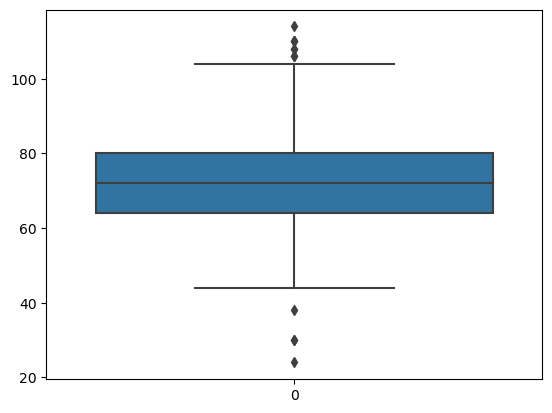

In [112]:
#verdeling bekijken zonder de 0
plt.figure(figsize=(10, 6))
test_bp = df_train_copy[df_train_copy['BloodPressure'] != 0]
sns.lineplot(test_bp['BloodPressure'])
plt.show()
sns.boxplot(test_bp['BloodPressure'])
plt.show()

In [5]:
#Wel wat uitschieters dus beter de mediaan. De mediaan is robuuster tegen uitschieters 
#(outliers) dan het gemiddelde. 

mediaan_bp = df_train_copy['BloodPressure'].median()
df_train_copy['BloodPressure'] = df_train_copy['BloodPressure'].replace(0, mediaan_bp)

<b> Wat doen met insuline? </b>  48% == 0

Insuline is waarschijnlijk een belangrijke voorspeller voor suikerziekte. Door eenvoudigweg de kolom te verwijderen of de ontbrekende rijen te verwijderen, zou je waarschijnlijk waardevolle informatie missen.

In [9]:
mediaan_ins = df_train_copy['Insulin'].median()
df_train_copy['Insulin'] = df_train_copy['Insulin'].replace(0, mediaan_ins)

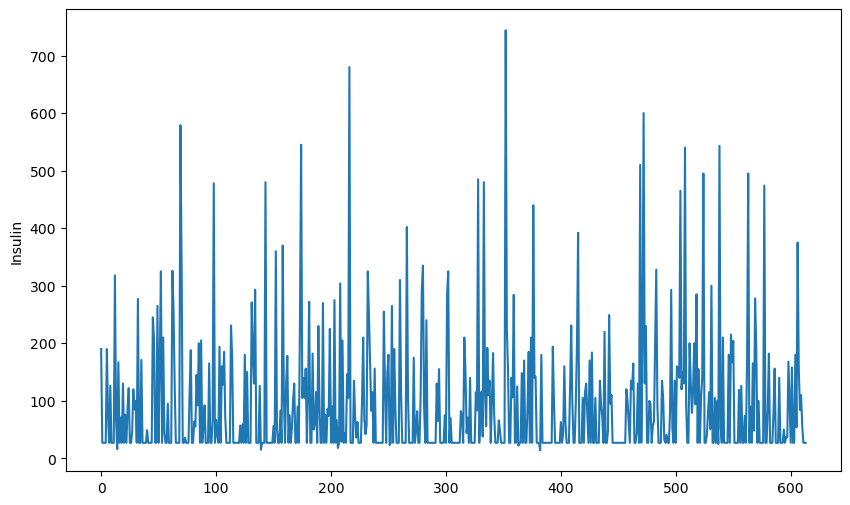

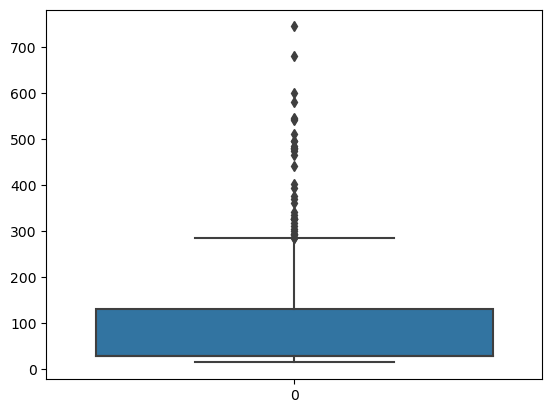

In [10]:
plt.figure(figsize=(10, 6))
test_bp = df_train_copy[df_train_copy['Insulin'] != 0]
sns.lineplot(test_bp['Insulin'])
plt.show()
sns.boxplot(test_bp['Insulin'])
plt.show()

<b> Wat doen met Skintickness? </b>  29.95% == 0

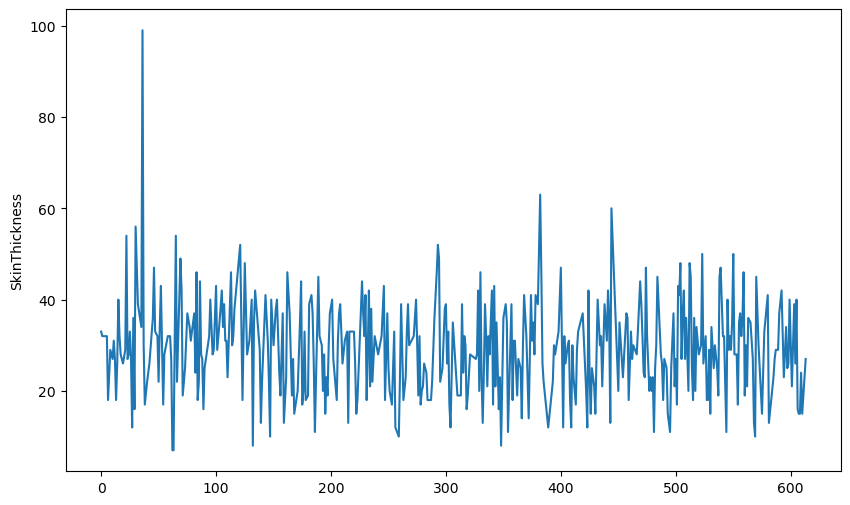

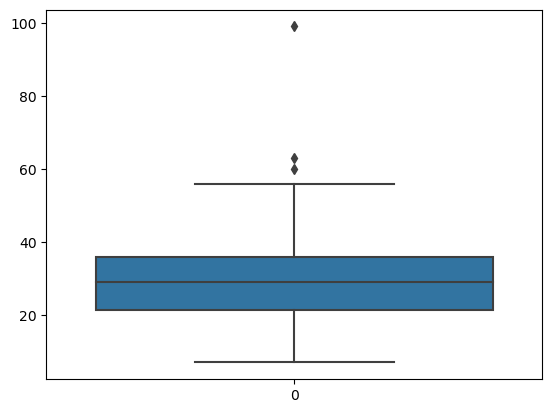

In [123]:
#verdeling bekijken zonder de 0
plt.figure(figsize=(10, 6))
test_st = df_train_copy[df_train_copy['SkinThickness'] != 0]
sns.lineplot(test_bp['SkinThickness'])
plt.show()
sns.boxplot(test_bp['SkinThickness'])
plt.show()

In [128]:
mediaan_st = df_train_copy['SkinThickness'].median()
df_train_copy['SkinThickness'] = df_train_copy['SkinThickness'].replace(0, mediaan_st)

In [12]:
#checken naar de basisstatistieken gevulde 0 waardes
df_train_copy.describe()

,p_id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,385.542345,3.809446,120.465798,72.539088,20.456026,94.442997,31.929642,0.468096,33.265472,0.342020
std,222.135103,3.375544,31.959619,12.020412,16.063105,108.221508,8.136791,0.329203,11.851427,0.474773
min,0.000000,0.000000,0.000000,24.000000,0.000000,14.000000,0.000000,0.078000,21.000000,0.000000
25%,194.250000,1.000000,99.000000,64.000000,0.000000,27.000000,27.400000,0.238000,24.000000,0.000000
50%,380.500000,3.000000,115.000000,72.000000,23.000000,28.000000,32.150000,0.365500,29.000000,0.000000
75%,583.750000,6.000000,140.000000,80.000000,32.000000,130.000000,36.500000,0.628500,41.000000,1.000000
max,767.000000,15.000000,197.000000,114.000000,99.000000,744.000000,67.100000,2.420000,72.000000,1.000000


<b> Nu kijken wat correleert </b>

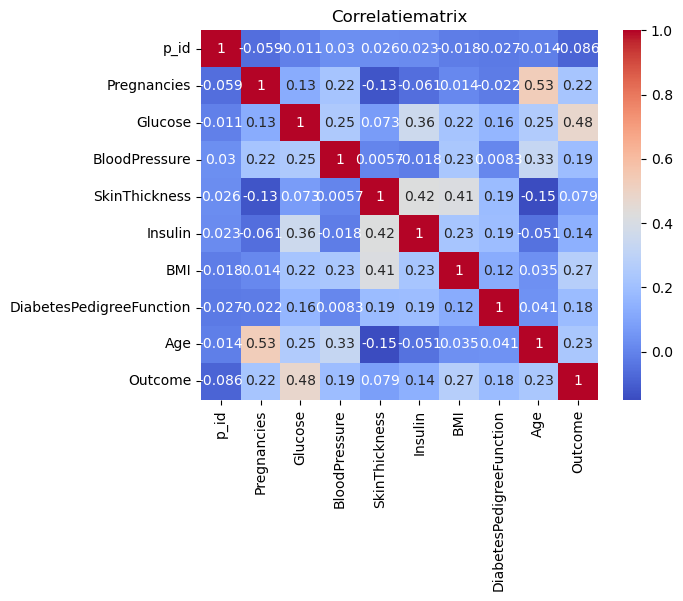

In [14]:
# Bereken de correlatiematrix
corr_matrix = df_train_copy.corr()
# Plot de correlatiematrix als een heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlatiematrix')
plt.show()


Correlaties tussen

Onafhankelijk
- Leeftijd & zwangerschap met 0.53
- Skinntickness & BMI

Afhankelijk
- Outcome & glucose

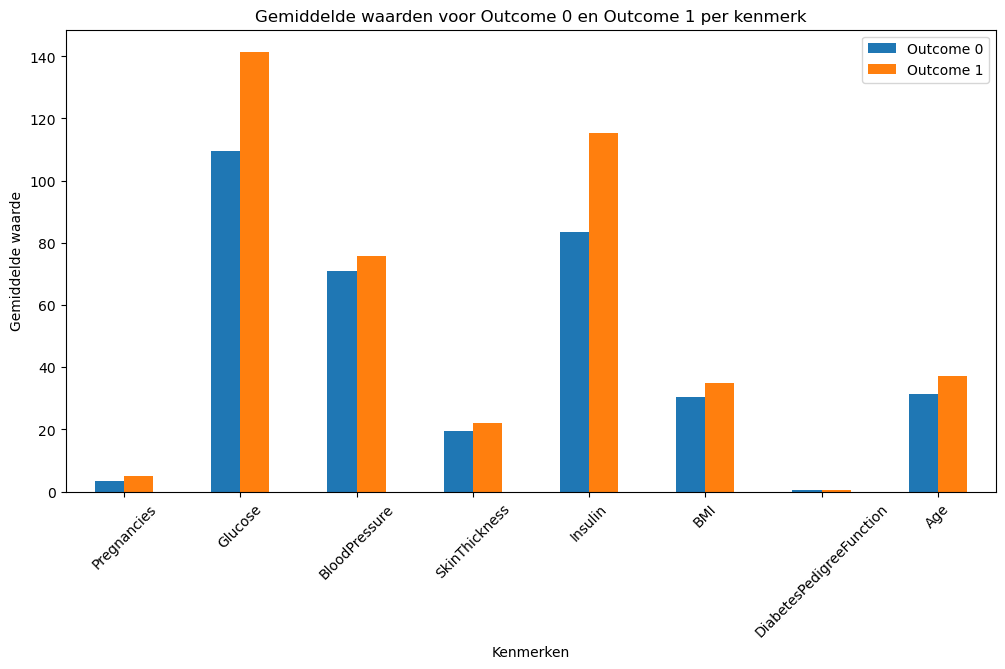

In [66]:
#Insuline hoort eigenlijk ook een invloed te hebben
#even kijken of dit gemiddeld genomen een verschil is
avg_out = df_train_copy.groupby(['Outcome']).mean()
avg_out = avg_out.drop('p_id', axis=1)
avg_out = avg_out.T
outcome_labels = ['Outcome 0', 'Outcome 1']

# Plot de barplots voor elke waarde (kolom)
avg_out.plot(kind='bar', figsize=(12, 6))
plt.xticks(rotation=45)  # Rotatie van x-as labels voor leesbaarheid
plt.xlabel('Kenmerken')
plt.ylabel('Gemiddelde waarde')
plt.title('Gemiddelde waarden voor Outcome 0 en Outcome 1 per kenmerk')
plt.legend(outcome_labels)
plt.show()

<b>Beschrijf wat wordt bedoeld met het standaardiseren van de data. Geef aan in welke gevallen dit gewenst is. Beargumenteer of het waarde toevoegt voor deze dataset en voer eventueel standaardisatie uit. </b>

Standaardiseren van data verwijst naar het proces waarbij de waarden van verschillende variabelen of kenmerken in een dataset worden omgezet zodat ze een vergelijkbare schaal hebben. Dit wordt meestal gedaan door de gegevens te transformeren zodat ze een gemiddelde van nul hebben en een standaarddeviatie (variantie) van één. In essentie wordt elke waarde in de dataset gecentreerd rond het gemiddelde en schalen we de waarden zodat ze een vergelijkbare spreiding hebben. 

Op basis van de weergegeven statistieken lijken de numerieke variabelen in deze dataset redelijk vergelijkbare schalen en orde van grootte te hebben. Het gemiddelde en de standaarddeviatie variëren niet sterk tussen de variabelen.

In dit specifieke geval lijkt standaardisatie mogelijk niet strikt noodzakelijk, vooral als je van plan bent algoritmen te gebruiken die niet bijzonder gevoelig zijn voor de schaal van de variabelen, zoals beslissingsbomen of random forests. Echter, als je van plan bent om algoritmen te gebruiken die afhankelijk zijn van de afstand tussen datapunten, zoals K-Nearest Neighbors (KNN) of Support Vector Machines (SVM), kan het nog steeds gunstig zijn om te standaardiseren om ervoor te zorgen dat alle variabelen op een vergelijkbare schaal liggen.

<b>Bevindingen EDA</b>

Een belangrijke bevinding van ons EDA is dat Glucose een positieve correlatie heeft met de outcome. 
Ook is gemiddeld genomen de mensen zonder suikerziekte een lagere insuline gehalte hebben als mensen met een hoger gehalte.